In [110]:
import csv

class Repository(object):
    def __init__(self,fileName):
        self.fileName = fileName
    def  loadData(self,inputColumnFst,inputColumnSnd,outputColumn,):
        data=[]
        columns=[]
        file = open(self.fileName)
        parsedData = csv.reader(file,delimiter=',')
       
        noLines = 0
        for line in parsedData:
            if noLines == 0:
                columns = line
            else:
                data.append(line)
            noLines += 1
        
        
        inputColumnIndexFst = columns.index(inputColumnFst)
        inputColumnIndexSnd = columns.index(inputColumnSnd)
        outputColumnIndex = columns.index(outputColumn)
    
        inputDataFst = []
        inputDataSnd = []
        outputData = []
        for j in range(len(data)):
            inputDataFst.append(float(data[j][inputColumnIndexFst]))
            inputDataSnd.append(float(data[j][inputColumnIndexSnd]))
            outputData.append(float(data[j][outputColumnIndex]))
        
        file.close()
        
        return inputDataFst,inputDataSnd,outputData

In [111]:
filename = "data.csv"
repository = Repository(filename)
inputColumnFst = 'Economy..GDP.per.Capita.'
inputColumnSnd = 'Freedom'

outputColumn = 'Happiness.Score'
inputDataResultFst,inputDataResultSnd,outputDataResult = repository.loadData(inputColumnFst,inputColumnSnd, outputColumn)
print('inputs for column '+inputColumnFst +' is: \n'+str(inputDataResultFst)+'\n')
print('inputs for column '+inputColumnSnd +' is: \n'+str(inputDataResultSnd)+'\n')
print('outputs for column '+outputColumn +' is: \n'+str(outputDataResult)+'\n')

inputs for column Economy..GDP.per.Capita. is: 
[1.61646318435669, 1.48238301277161, 1.480633020401, 1.56497955322266, 1.44357192516327, 1.50394463539124, 1.47920441627502, 1.40570604801178, 1.49438726902008, 1.484414935112, 1.37538242340088, 1.10970628261566, 1.48709726333618, 1.54625928401947, 1.53570663928986, 1.48792338371277, 1.46378076076508, 1.74194359779358, 1.44163393974304, 1.25278460979462, 1.62634336948395, 1.10735321044922, 1.35268235206604, 1.18529546260834, 1.15318381786346, 1.69227766990662, 1.34327983856201, 1.21755969524384, 0.872001945972443, 1.23374843597412, 1.43092346191406, 1.12786877155304, 1.43362653255463, 1.38439786434174, 1.87076568603516, 1.07062232494354, 1.53062355518341, 1.36135590076447, 1.63295245170593, 1.32539355754852, 1.48841226100922, 1.29121541976929, 0.737299203872681, 1.00082039833069, 0.909784495830536, 1.29178786277771, 0.786441087722778, 1.39506661891937, 1.28177809715271, 0.907975316047668, 1.41691517829895, 1.31458234786987, 1.091864466667

### defining function for plotting the inputData and the outputData

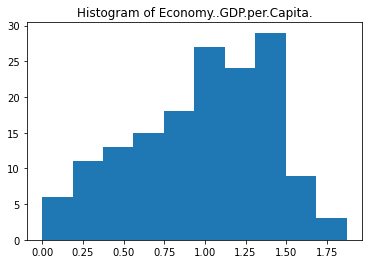

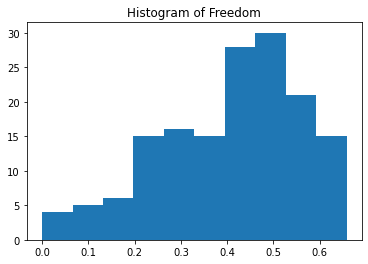

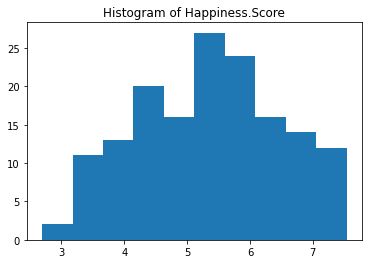

In [112]:
import matplotlib.pyplot as plt 

def plotDataHistogram(x, columnName):
    plt.hist(x, 10)
    plt.title('Histogram of ' + columnName)
    plt.show()
    
plotDataHistogram(inputDataResultFst,inputColumnFst)
plotDataHistogram(inputDataResultSnd,inputColumnSnd)
plotDataHistogram(outputDataResult,outputColumn)

### defining plotting for the training data inputs

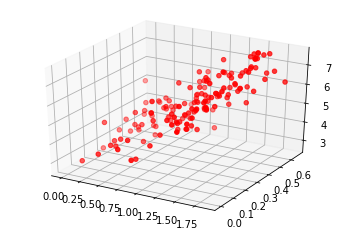

In [113]:
import numpy as np

fig = plt.figure()
ax = plt.axes(projection="3d")



z_points = np.array(outputDataResult)
x_points = np.array(inputDataResultFst)
y_points = np.array(inputDataResultSnd) 
ax.scatter(x_points, y_points, z_points, color="r")

plt.show()

### separating training data from test data 20%-80%

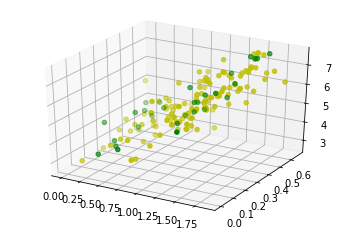

In [114]:
import numpy as np 
import math

np.random.seed(5)

# generate the positions of the data that will be a part of the test data
noTestDataIndexes = math.floor( 0.2 * len(inputDataResultFst))
testDataIndexes = []
for index in range(0,noTestDataIndexes):
    testDataIndexes.append(np.random.randint(0,len(inputDataResultFst)))

inputTestFst = []
inputTestSnd = []
outputTest = []
inputTrainingFst = []
inputTrainingSnd = []
outputTraining = []
for i in range (0,len(inputDataResultFst)):
    if i in testDataIndexes :
        inputTestFst.append(inputDataResultFst[i])
        inputTestSnd.append(inputDataResultSnd[i])
        outputTest.append(outputDataResult[i])
    else:
        inputTrainingFst.append(inputDataResultFst[i])
        inputTrainingSnd.append(inputDataResultSnd[i])
        outputTraining.append(outputDataResult[i])

# plotting differently the training and the test data 
import numpy as np

fig = plt.figure()
ax = plt.axes(projection="3d")



z_points_test = np.array(outputTest)
x_points_test = np.array(inputTestFst)
y_points_test = np.array(inputTestSnd) 
ax.scatter(x_points_test, y_points_test, z_points_test, color="g")

z_points_training = np.array(outputTraining)
x_points_training = np.array(inputTrainingFst)
y_points_training = np.array(inputTrainingSnd) 
ax.scatter(x_points_training, y_points_training, z_points_training, color="y")

plt.show()

### defining Normalization methods - mean ,stdDev


In [115]:
def mean(inputs):
    meanVector = []
    sum1 = 0
    sum2 = 0
    noOfSamples = len(inputs)
    for i in range(0,len(inputs)):
        sum1 += inputs[i][0]
        sum2 += inputs[i][1]
    meanVector.append(sum1/noOfSamples)
    meanVector.append(sum2/noOfSamples)
    return meanVector

def stdDev(inputs):
    stdDevVector = []
    meanVector = mean(inputs)
    noOfSamples = len(inputs)
    sum1 = 0
    sum2 = 0
    for i in range(0,len(inputs)):
        sum1 += (inputs[i][0] - meanVector[0]) ** 2
        sum2 += (inputs[i][1] - meanVector[1]) ** 2
    
    stdDevVector.append((1/noOfSamples * sum1) ** 0.5)
    stdDevVector.append((1/noOfSamples * sum2) ** 0.5)
    return stdDevVector
        

def statisticalNormalization(inputs,meanVector,stdDevVector):
    normalizedFeatures = []
    for i in range(0,len(inputs)):
        normalizedFeatures.append([(inputs[i][0]-meanVector[0])/stdDevVector[0],(inputs[i][1]-meanVector[1])/stdDevVector[1]])
    return  normalizedFeatures

**normalize training Data**



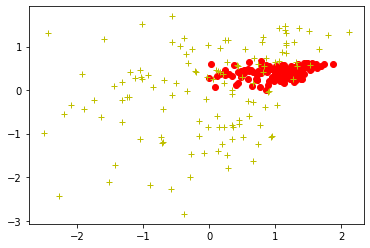

In [116]:
inputsTraining = []
for i in range(0,len(inputTrainingFst)):
    inputsTraining.append([inputTrainingFst[i],inputTrainingSnd[i]])
meanVector = mean(inputsTraining)
stdDevVector = stdDev(inputsTraining)
normalized = statisticalNormalization(inputsTraining,meanVector,stdDevVector)

plt.plot(inputTrainingFst, inputTrainingSnd, 'ro', label = 'raw data')

fstNormalized = []
sndNormalized = []
for i in range(0,len(normalized)):
    fstNormalized.append(normalized[i][0])
    sndNormalized.append(normalized[i][1])
    
plt.plot(fstNormalized, sndNormalized, 'y+', label = 'standardised data (mean = 0, stdDev = 1)')


**normalize test Data**


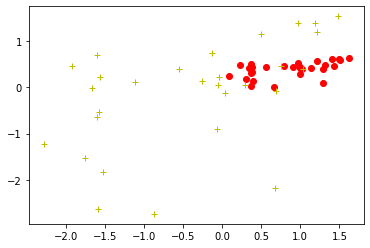

In [117]:
inputsTest = []
for i in range(0,len(inputTestFst)):
    inputsTest.append([inputTestFst[i],inputTestSnd[i]])
normalized = statisticalNormalization(inputsTest,meanVector,stdDevVector)

plt.plot(inputTestFst, inputTestSnd, 'ro', label = 'raw data')

fstNormalized = []
sndNormalized = []
for i in range(0,len(normalized)):
    fstNormalized.append(normalized[i][0])
    sndNormalized.append(normalized[i][1])
    
plt.plot(fstNormalized, sndNormalized, 'y+', label = 'standardised data (mean = 0, stdDev = 1)')

